In [1]:
import pandas as pd
import numpy as np
import math
import ast

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

RSEED = 30

In [3]:
df = pd.read_csv("leasing_opportunity.csv")

In [4]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,is_deal,gender,expected_price,followup
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,24/06/2016 7:54,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000.0,792 Metropolitan Avenue,1,female,2700.0,13.0
1,1,2,c5c8a357cba207596b04d1afd1e4f130,12/06/2016 12:19,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465.0,808 Columbus Avenue,0,male,5200.0,NaN
2,1,1,c3ba40552e2120b0acfc3cb5730bb2aa,17/04/2016 3:26,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"['Laundry In Building', 'Dishwasher', 'Hardwoo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,['https://photos.renthop.com/2/6887163_de85c42...,2850.0,241 W 13 Street,1,male,2900.0,NaN
3,1,1,28d9ad350afeaab8027513a3e52ac8d5,18/04/2016 2:22,Building Amenities - Garage - Garden - fitness...,East 49th Street,"['Hardwood Floors', 'No Fee']",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,['https://photos.renthop.com/2/6888711_6e660ce...,3275.0,333 East 49th Street,0,female,3500.0,NaN
4,1,4,0,28/04/2016 1:32,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,['Pre-War'],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,['https://photos.renthop.com/2/6934781_1fa4b41...,3350.0,500 West 143rd Street,0,female,3200.0,0.0


In [4]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'is_deal', 'gender',
       'expected_price', 'followup'],
      dtype='object')

In [5]:
df.describe()

,longitude,price,is_deal,expected_price,followup
count,48755.000000,4.875500e+04,53675.000000,4.875500e+04,26872.000000
mean,-73.955557,3.842052e+03,0.234094,3.791076e+03,7.498735
std,1.185096,2.220097e+04,0.423435,2.220123e+04,4.614796
min,-118.271000,4.300000e+01,0.000000,-4.000000e+02,0.000000
25%,-73.991700,2.500000e+03,0.000000,2.400000e+03,4.000000
50%,-73.977900,3.150000e+03,0.000000,3.100000e+03,7.000000
75%,-73.954800,4.100000e+03,0.000000,4.100000e+03,11.000000
max,0.000000,4.490000e+06,1.000000,4.489600e+06,15.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53675 entries, 0 to 53674
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49930 non-null  object 
 1   bedrooms         49949 non-null  object 
 2   building_id      49949 non-null  object 
 3   created          49949 non-null  object 
 4   description      48498 non-null  object 
 5   display_address  49316 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  object 
 8   listing_id       49272 non-null  object 
 9   longitude        48755 non-null  float64
 10  manager_id       48755 non-null  object 
 11  photos           48755 non-null  object 
 12  price            48755 non-null  float64
 13  street_address   48745 non-null  object 
 14  is_deal          53675 non-null  int64  
 15  gender           53675 non-null  object 
 16  expected_price   48755 non-null  float64
 17  followup    

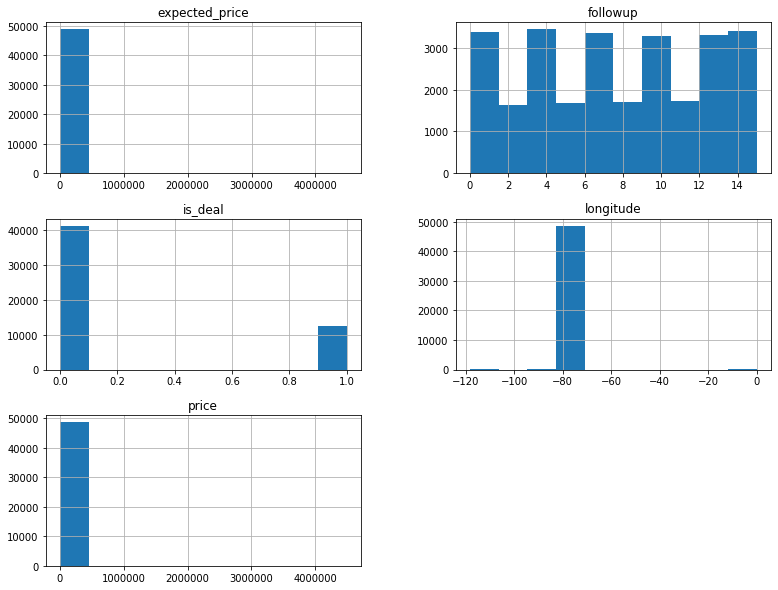

In [7]:
df.hist(figsize=(13,10))
plt.show()

## 1. data cleaning
- 如何处理NaN
- 如何处理异常值（price = 1000000）

## 2. feature understaing
- 看看feature和target(is_deal)之间的correlation

## feature engineering
- string --> catagorial --> feature
- bin --> catagorial feature

## 3. data partitioning
- k-fold

## 4. modeling
- logistic
- decision tree
- random forest
- xgboost

## 5. explanation and report

# 1. feature engineering

In [8]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'is_deal', 'gender',
       'expected_price', 'followup'],
      dtype='object')

In [5]:
df_final = pd.DataFrame()

## 1.1 deal with bathrooms, bedrooms

In [6]:
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

In [7]:
df_final[['bathrooms', 'bedrooms']] = df[['bathrooms', 'bedrooms']]
df_final.head()

,bathrooms,bedrooms
0,1.5,3.0
1,1.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,4.0


## 1.2 deal with building_id

In [8]:
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'is_deal', 'gender',
       'expected_price', 'followup'],
      dtype='object')

In [9]:
print('building_id has ', len(df['building_id'].unique()), ' unique values')

building_id has  7662  unique values


In [10]:
print('listing_id has ', len(df['listing_id'].unique()), ' unique values')

listing_id has  49229  unique values


In [11]:
print('manager_id has ', len(df['manager_id'].unique()), ' unique values')

manager_id has  3470  unique values


# 1.3 deal with description

In [12]:
df['description']

0        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
1                                                         
2        Top Top West Village location, beautiful Pre-w...
3        Building Amenities - Garage - Garden - fitness...
4        Beautifully renovated 3 bedroom flex 4 bedroom...
                               ...                        
53670    30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...
53671    HIGH END condo finishes, swimming pool, and ki...
53672    Large Renovated One Bedroom Apartment with Sta...
53673    Stylishly sleek studio apartment with unsurpas...
53674    Look no further!!!  This giant 2 bedroom apart...
Name: description, Length: 53675, dtype: object

In [13]:
!pip install textblob

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
from textblob import TextBlob

string = 'a happy day'
blob = TextBlob(string)
blob.sentiment

Sentiment(polarity=0.8, subjectivity=1.0)

In [16]:
string = 'a happy day. i am so happy'
blob = TextBlob(string)
blob.sentences

[Sentence("a happy day."), Sentence("i am so happy")]

In [21]:
# description_list = list(df['description'])

# from textblob import TextBlob

# dscpt_polarity = []
# dscpt_subjectivity = []

# for text in description_list:
#     blob = TextBlob(str(text))
    
#     polarity = []
#     subjectivity = []
#     for sentence in blob.sentences:
#         polarity.append(sentence.sentiment.polarity)
#         subjectivity.append(sentence.sentiment.subjectivity)
    
#     if len(polarity) > 0:
#         avg_polarity = sum(polarity)/len(polarity)
#     else:
#         avg_polarity = 0
# #         avg_polarity = float("nan")
        
#     if len(subjectivity) > 0:
#         avg_subjectivity = sum(subjectivity)/len(subjectivity)
#     else:
#         avg_polarity = 0
# #         avg_subjectivity = float('nan')

#     dscpt_polarity.append(avg_polarity)
#     dscpt_subjectivity.append(avg_subjectivity)


In [17]:
from textblob import TextBlob
import numpy as np

def get_sentiment(text):
    blob = TextBlob(str(text))
    if len(blob.sentences) == 0:
        return (0,0)
    polarity = [sentence.sentiment.polarity for sentence in blob.sentences]
    subjectivity = [sentence.sentiment.subjectivity for sentence in blob.sentences]
    polarity_avg = np.mean(polarity)
    subjectivity_avg = np.mean(subjectivity)
    return (polarity_avg, subjectivity_avg)

In [18]:
df['description'].iloc[0]

"A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted "

In [19]:
get_sentiment(df['description'].iloc[0])

(0.16035353535353536, 0.3071969696969697)

In [20]:
df[['dscpt_polarity', 'dscpt_subjectivity']] = df[['description']].apply(get_sentiment, axis=1, result_type="expand")

In [21]:
df_final[['dscpt_polarity', 'dscpt_subjectivity']] = df[['dscpt_polarity', 'dscpt_subjectivity']]
df_final.head()

,bathrooms,bedrooms,dscpt_polarity,dscpt_subjectivity
0,1.5,3.0,0.136364,0.454545
1,1.0,2.0,0.000000,0.000000
2,1.0,1.0,0.616667,0.666667
3,1.0,1.0,0.500000,1.000000
4,1.0,4.0,0.850000,1.000000


# Hint 1: features这一列如何进行特征工程

features表示该公寓的一些特色，比如是否有电梯，是否有健身房等。这个特色会影响到一个租客最终是否签约。这一列本身的数据类似是string，string里面有list，list里面的每个element是真正的feature。我们如何提取这些featur进行训练呢？

原来

| features |   |   |   |   |
|---       |---|---|---|---| 
| doorman  |   |   |   |   |
| elevater |   |   |   |   |
| NaN      |   |   |   |   |


特征工程后

| doorman | elevater  |   |   |   |
|---      |---|---|---|---| 
| 1       | 0  |   |   |   |
| 0       | 1  |   |   |   |
| 0       | 0  |   |   |   |



In [22]:
df['features'].head()

0                                                   []
1    ['Doorman', 'Elevator', 'Fitness Center', 'Cat...
2    ['Laundry In Building', 'Dishwasher', 'Hardwoo...
3                        ['Hardwood Floors', 'No Fee']
4                                          ['Pre-War']
Name: features, dtype: object

df.loc[df['features'].isnull(), 'features']

In [24]:
df['features'] = df['features'].fillna('[]')

In [25]:
df.loc[~df['features'].str.contains('\['), 'features'].unique()

array(['92758310b2a962b943484e8be0237a19',
       '4bdc3d8c1aaa90d997ce2cb77680679b',
       '624c1fbd75e5f99e6a7164cce1b1b8a4',
       'ff707b7f0a2ea94a26c784f06c9fec69',
       '699c325b818541f314b691b76f3238d7',
       'a1e83422f637157e3c14ab88d585b769',
       '5c11016f3d21d673b15db9f058c90200',
       'a621bebe105d26cd338d4c54f35f52e6',
       'c80aad40b6abd065b4aefee40a2154f6',
       '8b53ccf4338806ab1be3dd0267711649',
       'f510c42fc9e8765f19317cf2f84e3114',
       '536aaedf27d13fb487c142dae8133211',
       'c71cf1f472cf9b4b4517ea23fb6f2c91',
       'e6472c7237327dd3903b3d6f6a94515a',
       'b4518af7cc5d79517aca4157f1614478',
       '407ffad8d323810a4712d1446d5ad457',
       '90ddcebc5f1df89389cbc519535e0f2a',
       'df86259b169a78c024e4d5206d48cf44',
       '4bb850e243db09298a0bda50f9a99c81',
       '7892b9714d30934b1863796d61fbb81c',
       '6c2a16187e6855c132bb496b875a4ef7',
       'ef6323ef586350bb4f8dc78d924e856a',
       'd69d4e111612dd12ef864031c1148543',
       'a4a

In [26]:
df.loc[~df['features'].str.contains('\['), 'features'] = '[]'

# 目标是
```
[['Doorman', 'Elevator', 'Fitness Center', 'Cats Allowed', 'Dogs Allowed'],
 ['Hardwood Floors', 'No Fee'],
 ..]]

--> 

['Doorman', 'Elevator', 'Fitness Center', 'Cats Allowed', 'Dogs Allowed', 'Hardwood Floors', 'No Fee']
```

In [27]:
feature_nested_list = df['features'].apply(ast.literal_eval)
feature_nested_list

0                                                       []
1        [Doorman, Elevator, Fitness Center, Cats Allow...
2        [Laundry In Building, Dishwasher, Hardwood Flo...
3                                [Hardwood Floors, No Fee]
4                                                [Pre-War]
                               ...                        
53670    [Elevator, Laundry in Building, Laundry in Uni...
53671    [Common Outdoor Space, Cats Allowed, Dogs Allo...
53672    [Doorman, Elevator, Pre-War, Dogs Allowed, Cat...
53673    [Doorman, Elevator, Pre-War, Dogs Allowed, Cat...
53674                                    [Hardwood Floors]
Name: features, Length: 53675, dtype: object

In [28]:
feature_nested_list.explode()

0                    NaN
1                Doorman
1               Elevator
1         Fitness Center
1           Cats Allowed
              ...       
53673           Elevator
53673            Pre-War
53673       Dogs Allowed
53673       Cats Allowed
53674    Hardwood Floors
Name: features, Length: 274245, dtype: object

In [29]:
feature_unnested = feature_nested_list.explode().dropna()
feature_unnested

1                Doorman
1               Elevator
1         Fitness Center
1           Cats Allowed
1           Dogs Allowed
              ...       
53673           Elevator
53673            Pre-War
53673       Dogs Allowed
53673       Cats Allowed
53674    Hardwood Floors
Name: features, Length: 266310, dtype: object

In [30]:
print('Total number of apartment is ', len(df['features']))
print('Total number features is', len(feature_unnested))

Total number of apartment is  53675
Total number features is 266310


In [31]:
top_features = feature_unnested.value_counts()[:10]
top_features

Elevator               25759
Hardwood Floors        23445
Cats Allowed           23271
Dogs Allowed           21786
Doorman                20793
Dishwasher             20353
No Fee                 17871
Laundry in Building    16279
Fitness Center         13182
Pre-War                 9120
Name: features, dtype: int64

In [32]:
top_feature_list = list(top_features.index)

In [33]:
top_feature_list

['Elevator',
 'Hardwood Floors',
 'Cats Allowed',
 'Dogs Allowed',
 'Doorman',
 'Dishwasher',
 'No Fee',
 'Laundry in Building',
 'Fitness Center',
 'Pre-War']

```
dict {'Elevator': [0, 0, 1, 1, ...],
      'Hardwood Floors': [1, 0, ...]}
```

In [34]:
from collections import defaultdict
feature_map = defaultdict(list)

for feature_nested in feature_nested_list:
    for feature_selected in top_feature_list:
        if feature_selected in feature_nested:
            feature_map[feature_selected].append(1)
        else:
            feature_map[feature_selected].append(0)

In [35]:
df['features']

0                                                       []
1        ['Doorman', 'Elevator', 'Fitness Center', 'Cat...
2        ['Laundry In Building', 'Dishwasher', 'Hardwoo...
3                            ['Hardwood Floors', 'No Fee']
4                                              ['Pre-War']
                               ...                        
53670    ['Elevator', 'Laundry in Building', 'Laundry i...
53671    ['Common Outdoor Space', 'Cats Allowed', 'Dogs...
53672    ['Doorman', 'Elevator', 'Pre-War', 'Dogs Allow...
53673    ['Doorman', 'Elevator', 'Pre-War', 'Dogs Allow...
53674                                  ['Hardwood Floors']
Name: features, Length: 53675, dtype: object

In [36]:
feature_df = pd.DataFrame.from_dict(feature_map)
feature_df

,Elevator,Hardwood Floors,Cats Allowed,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
53670,1,1,0,0,0,1,1,1,0,0
53671,1,0,1,1,1,0,0,0,1,0
53672,1,0,1,1,1,0,0,0,0,1
53673,1,0,1,1,1,0,0,0,0,1


In [37]:
df_final = pd.concat([df_final, feature_df], axis=1)
df_final

,bathrooms,bedrooms,dscpt_polarity,dscpt_subjectivity,Elevator,Hardwood Floors,Cats Allowed,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War
0,1.5,3.0,0.136364,0.454545,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,0.000000,0.000000,1,0,1,1,1,0,0,0,1,0
2,1.0,1.0,0.616667,0.666667,0,1,0,0,0,1,0,0,0,0
3,1.0,1.0,0.500000,1.000000,0,1,0,0,0,0,1,0,0,0
4,1.0,4.0,0.850000,1.000000,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53670,1.0,2.0,0.175000,0.775000,1,1,0,0,0,1,1,1,0,0
53671,1.0,1.0,0.160000,0.540000,1,0,1,1,1,0,0,0,1,0
53672,1.0,1.0,0.214286,0.428571,1,0,1,1,1,0,0,0,0,1
53673,1.0,0.0,0.500000,1.000000,1,0,1,1,1,0,0,0,0,1


## 1.5 deal with photos

In [38]:
df['photos'][0]

"['https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg', 'https://photos.renthop.com/2/7211212_7dfc41dced69245065df83d08eed4a00.jpg', 'https://photos.renthop.com/2/7211212_c17853c4b869af6f53af08b0f5820b4c.jpg', 'https://photos.renthop.com/2/7211212_787ad8ea0c089792e7453e2121f8ac89.jpg', 'https://photos.renthop.com/2/7211212_2e88b0d293ee333c804c2f00536eee49.jpg']"

In [39]:
df['photos'] = df['photos'].fillna('[]')
df[~df['photos'].str.contains('\[')]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,is_deal,gender,expected_price,followup,dscpt_polarity,dscpt_subjectivity


In [40]:
photo_nested_list = df['photos'].apply(ast.literal_eval)
photo_nested_list[:2]

0    [https://photos.renthop.com/2/7211212_1ed4542e...
1    [https://photos.renthop.com/2/7150865_be3306c5...
Name: photos, dtype: object

In [41]:
num_of_photos = photo_nested_list.apply(len)
num_of_photos[:2]

0     5
1    11
Name: photos, dtype: int64

In [42]:
df_final['num_of_photos'] = num_of_photos
df_final[['num_of_photos']].head()

,num_of_photos
0,5
1,11
2,8
3,3
4,3


# 1.6 deal with gender

In [43]:
pd.get_dummies(df['gender'], drop_first=True)

,male
0,0
1,1
2,1
3,0
4,0
...,...
53670,1
53671,0
53672,0
53673,0


In [44]:
df_final['gender'] = pd.get_dummies(df['gender'], drop_first=True)

# 1.7 other features

In [57]:
df_final.to_csv('final.csv')

In [46]:
labels = df['is_deal']

In [47]:
print(sum(labels == 0))
print(sum(labels == 1))

41110
12565


# 2. 数据分割和均一化

## 2.1 均一化

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53675 entries, 0 to 53674
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bathrooms            49352 non-null  float64
 1   bedrooms             49352 non-null  float64
 2   dscpt_polarity       53675 non-null  float64
 3   dscpt_subjectivity   53675 non-null  float64
 4   Elevator             53675 non-null  int64  
 5   Hardwood Floors      53675 non-null  int64  
 6   Cats Allowed         53675 non-null  int64  
 7   Dogs Allowed         53675 non-null  int64  
 8   Doorman              53675 non-null  int64  
 9   Dishwasher           53675 non-null  int64  
 10  No Fee               53675 non-null  int64  
 11  Laundry in Building  53675 non-null  int64  
 12  Fitness Center       53675 non-null  int64  
 13  Pre-War              53675 non-null  int64  
 14  num_of_photos        53675 non-null  int64  
 15  gender               53675 non-null 

In [107]:
features_standard = ['num_of_photos', 'price', 'expected_price', 'followup']
df_standard = df_final[features_standard]
df_standard.head()

,num_of_photos,price,expected_price,followup
0,5,3000.0,2700.0,13.0
1,11,5465.0,5200.0,NaN
2,8,2850.0,2900.0,NaN
3,3,3275.0,3500.0,NaN
4,3,3350.0,3200.0,0.0


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_standard =sc.fit_transform(df_standard)
df_standard = sc.transform(df_standard)

In [109]:
df_final[features_standard] = df_standard

In [56]:
df_final

,bathrooms,bedrooms,dscpt_polarity,dscpt_subjectivity,Elevator,Hardwood Floors,Cats Allowed,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War,num_of_photos,gender,price,expected_price,followup
0,1.5,3.0,0.136364,0.454545,0,0,0,0,0,0,0,0,0,0,5,0,3000.0,2700.0,13.0
1,1.0,2.0,0.000000,0.000000,1,0,1,1,1,0,0,0,1,0,11,1,5465.0,5200.0,NaN
2,1.0,1.0,0.616667,0.666667,0,1,0,0,0,1,0,0,0,0,8,1,2850.0,2900.0,NaN
3,1.0,1.0,0.500000,1.000000,0,1,0,0,0,0,1,0,0,0,3,0,3275.0,3500.0,NaN
4,1.0,4.0,0.850000,1.000000,0,0,0,0,0,0,0,0,0,1,3,0,3350.0,3200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53670,1.0,2.0,0.175000,0.775000,1,1,0,0,0,1,1,1,0,0,4,1,3200.0,3500.0,7.0
53671,1.0,1.0,0.160000,0.540000,1,0,1,1,1,0,0,0,1,0,8,0,3950.0,3500.0,NaN
53672,1.0,1.0,0.214286,0.428571,1,0,1,1,1,0,0,0,0,1,3,0,2595.0,2200.0,5.0
53673,1.0,0.0,0.500000,1.000000,1,0,1,1,1,0,0,0,0,1,9,0,3350.0,3900.0,15.0


## 2.2 数据分割

In [111]:
from sklearn.model_selection import train_test_split

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df_final, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

In [112]:
print('training sample is ', train.shape)
print('test sample is', test.shape)

training sample is  (37572, 19)
test sample is (16103, 19)


In [ ]:
##Descriptive analysis

In [58]:
# To begin this exploratory analysis, first import libraries and define functions and utilities to work with the data.

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for beautiful plots and some types of graphs
import seaborn as sns

In [60]:
def plotCorrelationMatrix(df, graphWidth, segmentName=None):
    filename = segmentName if segmentName else getattr(df, "dataframeName", segmentName)
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [64]:
df_final1=df_final

In [65]:
df_final1["is_deal"]= df["is_deal"]

In [67]:
df_final1

,bathrooms,bedrooms,dscpt_polarity,dscpt_subjectivity,Elevator,Hardwood Floors,Cats Allowed,Dogs Allowed,Doorman,Dishwasher,No Fee,Laundry in Building,Fitness Center,Pre-War,num_of_photos,gender,price,expected_price,followup,is_deal
0,1.5,3.0,0.136364,0.454545,0,0,0,0,0,0,0,0,0,0,5,0,3000.0,2700.0,13.0,1
1,1.0,2.0,0.000000,0.000000,1,0,1,1,1,0,0,0,1,0,11,1,5465.0,5200.0,NaN,0
2,1.0,1.0,0.616667,0.666667,0,1,0,0,0,1,0,0,0,0,8,1,2850.0,2900.0,NaN,1
3,1.0,1.0,0.500000,1.000000,0,1,0,0,0,0,1,0,0,0,3,0,3275.0,3500.0,NaN,0
4,1.0,4.0,0.850000,1.000000,0,0,0,0,0,0,0,0,0,1,3,0,3350.0,3200.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53670,1.0,2.0,0.175000,0.775000,1,1,0,0,0,1,1,1,0,0,4,1,3200.0,3500.0,7.0,0
53671,1.0,1.0,0.160000,0.540000,1,0,1,1,1,0,0,0,1,0,8,0,3950.0,3500.0,NaN,0
53672,1.0,1.0,0.214286,0.428571,1,0,1,1,1,0,0,0,0,1,3,0,2595.0,2200.0,5.0,0
53673,1.0,0.0,0.500000,1.000000,1,0,1,1,1,0,0,0,0,1,9,0,3350.0,3900.0,15.0,1


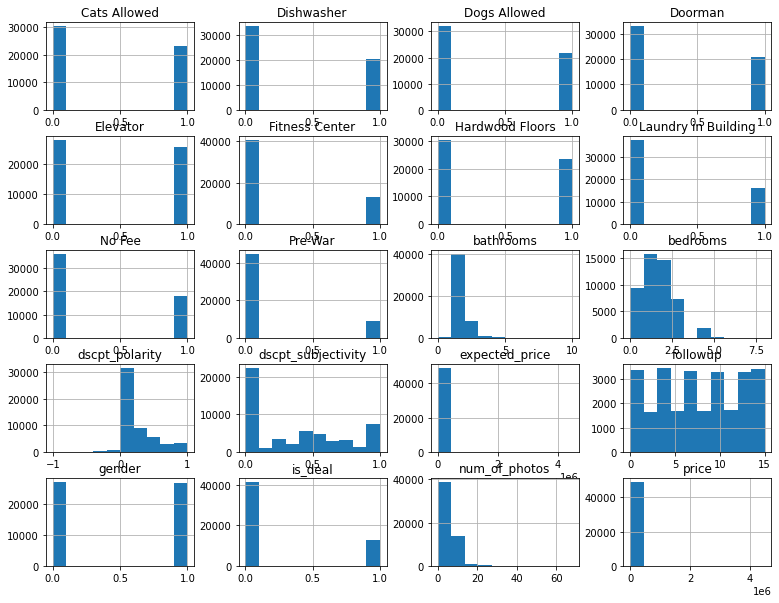

In [73]:
df_final1.hist(figsize=(13,10))
plt.show()

In [72]:
df_final1.to_csv('final2.csv')

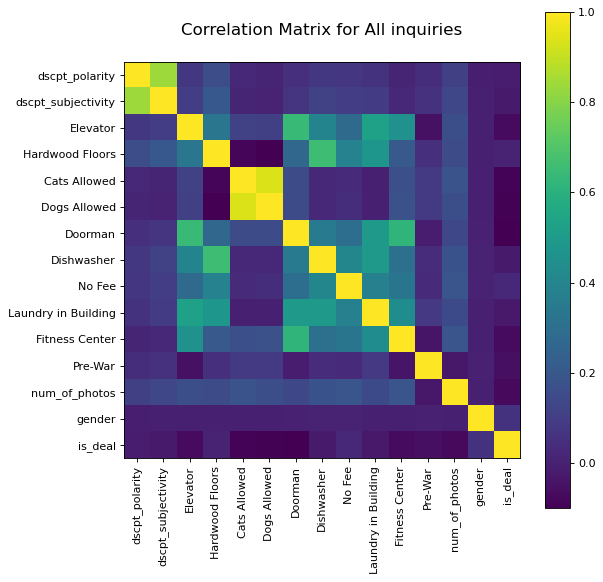

In [68]:
plotCorrelationMatrix(df_final1, 8, "All inquiries")

# 3. 模型training
## 3.1 Baseline Model: Logistic Regression

In [237]:
performance = {}

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [232]:
logregModel = LogisticRegression(C=400) #instantiate
logregModel.fit(train, train_labels) # fit model

LogisticRegression(C=400, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
preds = logregModel.predict(train)

print("Precision = {}".format(precision_score(train_labels, preds, average='macro')))
print("Recall = {}".format(recall_score(train_labels, preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(train_labels, preds)))

Precision = 0.3829487077111448
Recall = 0.4999478750390937
Accuracy = 0.7658362610454594


In [242]:
preds = logregModel.predict(test)

pres, rec, acc = (
    precision_score(test_labels, preds, average='macro'),
    recall_score(test_labels, preds, average='macro'),
    accuracy_score(test_labels, preds)
)
print("Precision = {}".format(pres))
print("Recall = {}".format(rec))
print("Accuracy = {}".format(acc))

performance['logistic'] = (pres, rec, acc)

Precision = 0.3829337970438455
Recall = 0.49995945836373956
Accuracy = 0.7658200335341241


In [239]:
preds.sum()

1

In [240]:
test_labels.sum()

3770

In [241]:
logregModel.coef_

array([[-0.29929301,  0.09454247,  0.07624918, -0.11582866, -0.05648102,
         0.07078875,  0.02854568, -0.32849005, -0.48165352, -0.04013258,
         0.33048016,  0.14803438, -0.04653605, -0.38846947, -0.60667547,
         0.2961993 ,  0.27502064,  0.27141961,  0.01495243]])

In [169]:
list(zip(train.columns, logregModel.coef_[0]))

[('bathrooms', -0.29929301245574685),
 ('bedrooms', 0.09454246900499783),
 ('dscpt_polarity', 0.07624917741119284),
 ('dscpt_subjectivity', -0.11582866052570917),
 ('Elevator', -0.05648102051132694),
 ('Hardwood Floors', 0.0707887473203212),
 ('Cats Allowed', 0.028545678014498817),
 ('Dogs Allowed', -0.32849004812842847),
 ('Doorman', -0.4816535157251992),
 ('Dishwasher', -0.040132580538014065),
 ('No Fee', 0.33048016290616455),
 ('Laundry in Building', 0.14803437913491685),
 ('Fitness Center', -0.04653605494041259),
 ('Pre-War', -0.38846947244239505),
 ('num_of_photos', -0.6066754688644703),
 ('gender', 0.29619930433736713),
 ('price', 0.27502064058348635),
 ('expected_price', 0.2714196058080121),
 ('followup', 0.014952430083192688)]

## 3.2 Model Selection
### 3.1.1 decision tree

In [170]:
# Make a decision tree and train
treeModel = tree.DecisionTreeClassifier()
treeModel.fit(train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [255]:
preds2 = treeModel.predict(test)

pres, rec, acc = (
    precision_score(test_labels, preds2, average='macro'),
    recall_score(test_labels, preds2, average='macro'),
    accuracy_score(test_labels, preds2)
)
print("Precision = {}".format(pres))
print("Recall = {}".format(rec))
print("Accuracy = {}".format(acc))

performance['decision_tree'] = (pres, rec, acc)

Precision = 0.5254073872315648
Recall = 0.5233045692037128
Accuracy = 0.6722349872694529


In [172]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': treeModel.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
17,expected_price,0.170748
16,price,0.149383
14,num_of_photos,0.115779
18,followup,0.107736
2,dscpt_polarity,0.106574
3,dscpt_subjectivity,0.106042
1,bedrooms,0.040414
11,Laundry in Building,0.020219
9,Dishwasher,0.020166
4,Elevator,0.019413


### 3.1.2 random forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create the model with 100 trees
RM_model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
RM_model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=30, verbose=1,
                       warm_start=False)

In [254]:
preds3 = RM_model.predict(test)

pres, rec, acc = (
    precision_score(test_labels, preds3, average='macro'),
    recall_score(test_labels, preds3, average='macro'),
    accuracy_score(test_labels, preds3)
)
print("Precision = {}".format(pres))
print("Recall = {}".format(rec))
print("Accuracy = {}".format(acc))

performance['random_forest'] = (pres, rec, acc)

Precision = 0.589082748323531
Recall = 0.5173644129603331
Accuracy = 0.7590511084891014


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [174]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': RM_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
17,expected_price,0.170170
16,price,0.146372
14,num_of_photos,0.113439
18,followup,0.107116
2,dscpt_polarity,0.101994
3,dscpt_subjectivity,0.100606
1,bedrooms,0.054621
15,gender,0.021725
0,bathrooms,0.020426
4,Elevator,0.018922


### 3.1.3 xgboost

In [248]:
from xgboost import XGBClassifier

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'binary:logistic',
} 

xgb_model = XGBClassifier(**param)
xgb_model.fit(X=train, y=train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [249]:
xgb_preds = xgb_model.predict(test)

pres, rec, acc = (
    precision_score(test_labels, xgb_preds, average='macro'),
    recall_score(test_labels, xgb_preds, average='macro'),
    accuracy_score(test_labels, xgb_preds)
)
print("Precision = {}".format(pres))
print("Recall = {}".format(rec))
print("Accuracy = {}".format(acc))

performance['xgboost'] = (pres, rec, acc)

Precision = 0.649815180338051
Recall = 0.5215188122870623
Accuracy = 0.7672483388188537


## 3.2 Compare

In [256]:
pd.DataFrame(performance, index=['precision', 'recall', 'accuracy'])

,logistic,decision_tree,xgboost,random_forest
precision,0.382934,0.525407,0.649815,0.589083
recall,0.499959,0.523305,0.521519,0.517364
accuracy,0.765820,0.672235,0.767248,0.759051


In [257]:
print(classification_report(test_labels, xgb_preds))

              precision    recall  f1-score   support

           0       0.77      0.98      0.87     12333
           1       0.53      0.06      0.11      3770

    accuracy                           0.77     16103
   macro avg       0.65      0.52      0.49     16103
weighted avg       0.72      0.77      0.69     16103



In [258]:
confusion_matrix(test_labels, best_preds)

array([[12244,    89],
       [ 3668,   102]], dtype=int64)

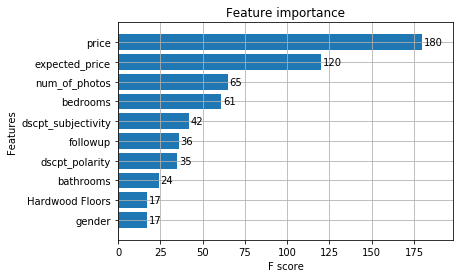

In [259]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_model, max_num_features=10, height=0.8)
pyplot.show()

## 可以进行的模型改进

1. 处理数据不平衡问题，防止出现某一个类别几乎dominate
2. 模型参数调整
3. 其他变量的研究